<a href="https://colab.research.google.com/github/eeleoj62/portfolio/blob/main/machine_learning/metrics_and_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install faraway

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 8.7 MB/s eta 0:00:00


### Step 0

In [ ]:
# CodeGrade step0

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

### Step 1

*  [Data](https://rdrr.io/cran/faraway/man/pima.html)
*  [Faraway](https://pypi.org/project/faraway/)

In [ ]:
# CodeGrade step0

# Load the Dataset from faraway
from faraway.datasets import pima

# Load the dataset
data = pima.load()

# # Convert 'diabetes' column to int type to represent classes 0 and 1
# data['diabetes'] = data['diabetes'].astype(int)
# diabetes shouldn't be converted to 0 and 1, its diabetes pedigree function
# and needs to stay in its current decimal form

In [ ]:
# Display the first few rows and info
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glucose    768 non-null    int64  
 2   diastolic  768 non-null    int64  
 3   triceps    768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   diabetes   768 non-null    float64
 7   age        768 non-null    int64  
 8   test       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(754, 9)
pregnant     0
glucose      0
diastolic    0
triceps      0
insulin      0
bmi          0
diabetes     0
age          0
test         0
dtype: int64
pregnant
0     109
1     130
2     101
3      75
4      67
5      55
6      49
7      45
8      37
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: count, dtype: int64


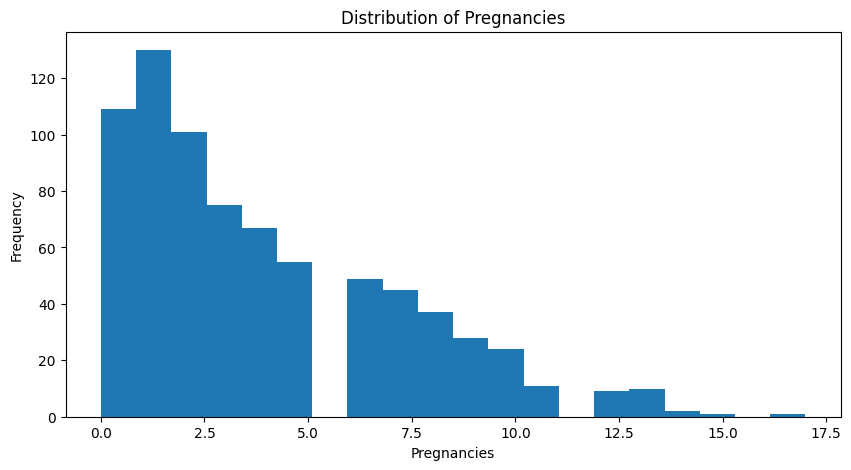

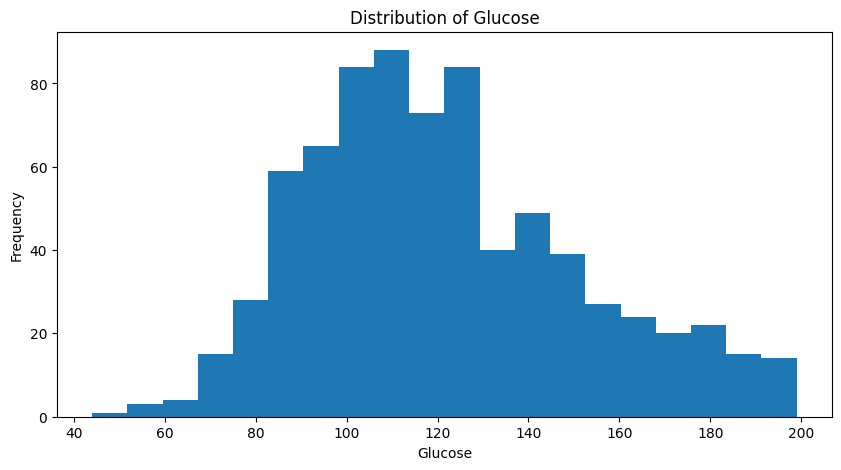

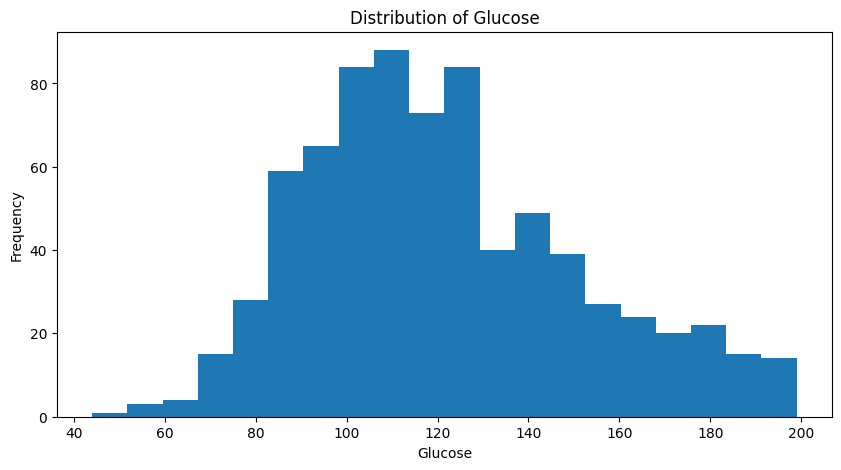

diastolic
24.0      1
30.0      2
38.0      1
40.0      1
44.0      4
46.0      2
48.0      4
50.0     13
52.0     10
54.0     11
55.0      2
56.0     12
58.0     21
60.0     36
61.0      1
62.0     34
64.0     43
65.0      7
66.0     30
68.0     42
70.0     55
72.0     79
74.0     51
75.0      8
76.0     38
78.0     45
80.0     39
82.0     30
84.0     22
85.0      6
86.0     21
88.0     24
90.0     21
92.0      8
94.0      6
95.0      1
96.0      4
98.0      3
100.0     3
102.0     1
104.0     2
106.0     3
108.0     2
110.0     3
114.0     1
122.0     1
Name: count, dtype: int64


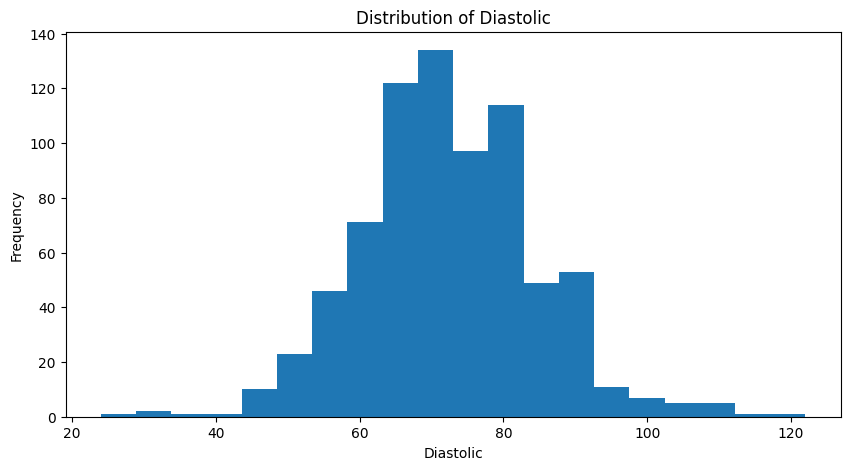

triceps
7.0       2
8.0       2
10.0      5
11.0      6
12.0      7
13.0     11
14.0      6
15.0     14
16.0      6
17.0     14
18.0     20
19.0     18
20.0     11
21.0     10
22.0     16
23.0     22
24.0     11
25.0     16
26.0     16
27.0     22
28.0     20
29.0    244
30.0     27
31.0     19
32.0     30
33.0     19
34.0      8
35.0     14
36.0     14
37.0     16
38.0      7
39.0     17
40.0     16
41.0     14
42.0     11
43.0      6
44.0      3
45.0      5
46.0      8
47.0      4
48.0      4
49.0      2
50.0      3
51.0      1
52.0      2
54.0      2
56.0      1
60.0      1
63.0      1
Name: count, dtype: int64


<ipython-input-16-9c53cd98199a>:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['triceps'].fillna(data['triceps'].median(), inplace=True)
<ipython-input-16-9c53cd98199a>:82: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

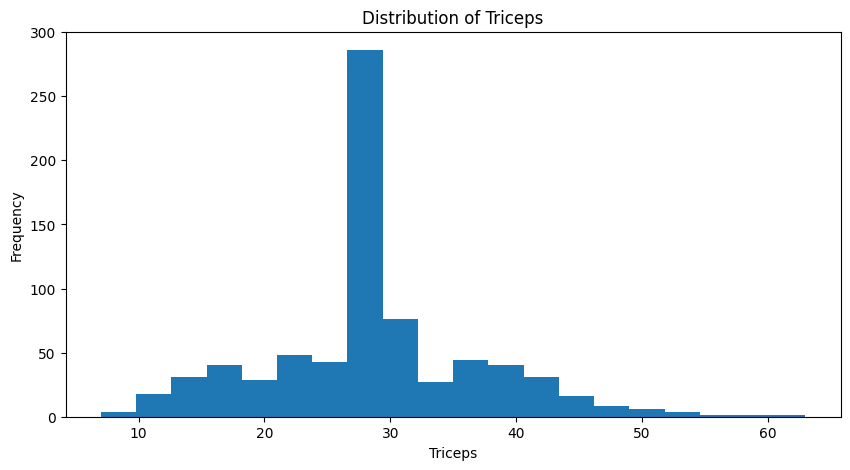

insulin
14.0     1
15.0     1
16.0     1
18.0     2
22.0     1
        ..
474.0    1
478.0    1
480.0    2
485.0    1
495.0    2
Name: count, Length: 176, dtype: int64


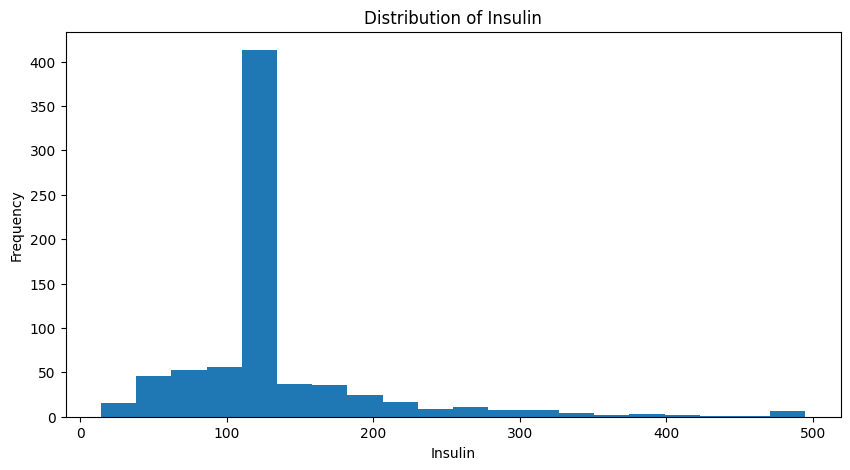

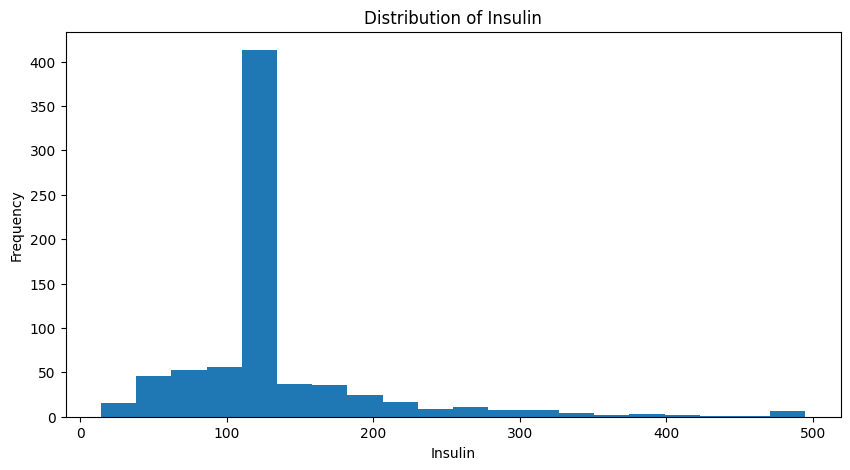

bmi
18.2    3
18.4    1
19.1    1
19.3    1
19.4    1
       ..
53.2    1
55.0    1
57.3    1
59.4    1
67.1    1
Name: count, Length: 245, dtype: int64


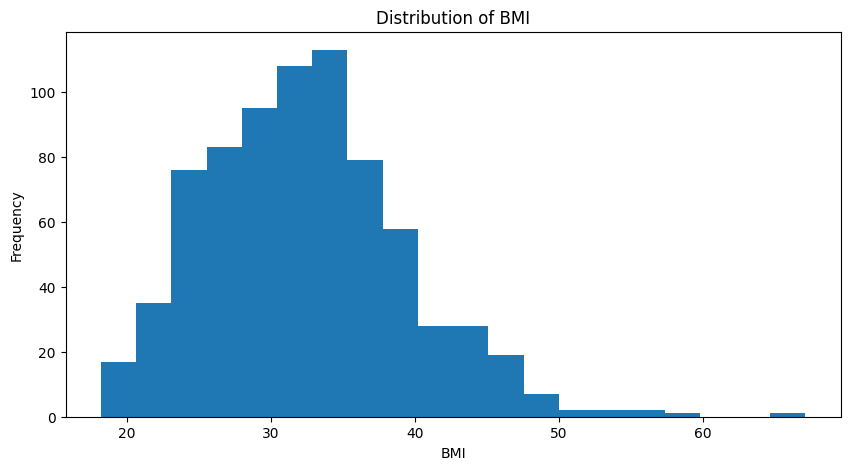

diabetes
0.254    6
0.258    6
0.259    5
0.238    5
0.268    5
        ..
0.704    1
0.529    1
0.627    1
0.826    1
1.441    1
Name: count, Length: 510, dtype: int64


<ipython-input-16-9c53cd98199a>:134: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


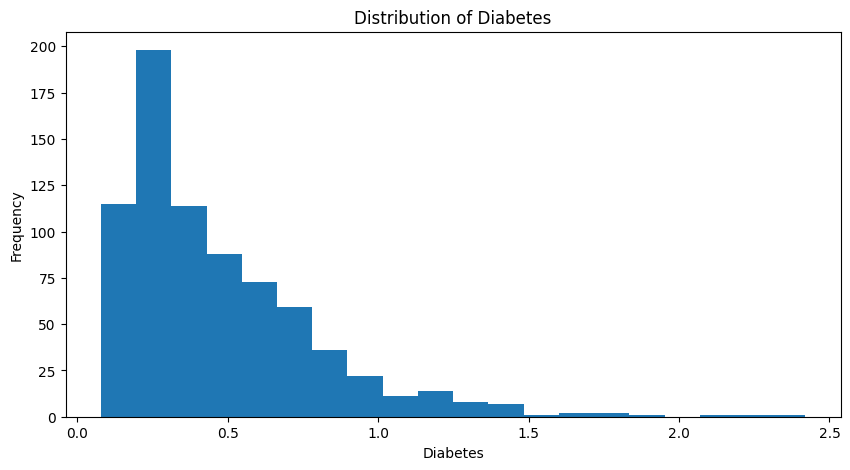

age
21    62
22    70
23    37
24    46
25    47
26    32
27    32
28    34
29    29
30    21
31    23
32    16
33    17
34    13
35    10
36    16
37    18
38    16
39    12
40    13
41    21
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     7
53     4
54     6
55     4
56     3
57     5
58     7
59     2
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
Name: count, dtype: int64


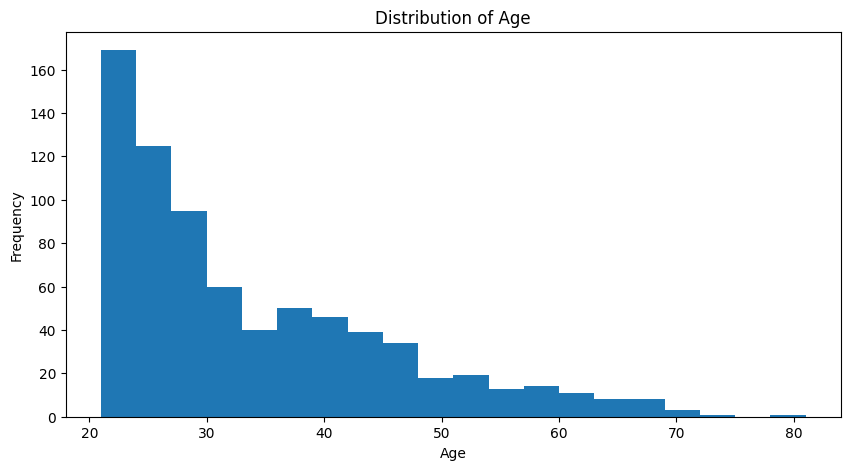

In [ ]:
# CodeGrade step1

# Shape
print(data.shape)

#  Check for missing values
print(data.isnull().sum())

# evaluate columns
sorted(data['pregnant'].unique())

# 10+ pregnancies seems high
print(data['pregnant'].value_counts().sort_index())

# number of high # pregnancies is right skewed, might be correct
plt.figure(figsize=(10,5))
plt.hist(data['pregnant'], bins=20)
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.title('Distribution of Pregnancies')
plt.show()

# glucose
sorted(data['glucose'].unique())
data['glucose'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.hist(data['glucose'], bins=20)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose')
plt.show()

# 5 instances where glucose is 0 which can't be possible unless they're dead
df_glucose_zero = data[data['glucose'] == 0]
df_glucose_zero

# drop the 5 rows where gluc = 0
data['glucose'] = data['glucose'].replace(0, np.nan)
data = data.dropna(subset=['glucose'])

# plot glucose again
plt.figure(figsize=(10,5))
plt.hist(data['glucose'], bins=20)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose')
plt.show()

# diastolic
sorted(data['diastolic'].unique())

print(data['diastolic'].value_counts().sort_index())

# plot diastolic
plt.figure(figsize=(10,5))
plt.hist(data['diastolic'], bins=20)
plt.xlabel('Diastolic')
plt.ylabel('Frequency')
plt.title('Distribution of Diastolic')
plt.show()

# 35 instances where diastolic = 0
# impute with median diastolic
data['diastolic'] = data['diastolic'].replace(0, np.nan)
data['diastolic'] = data['diastolic'].fillna(data['diastolic'].median())

# triceps
sorted(data['triceps'].unique())
print(data['triceps'].value_counts().sort_index())

# 1 instance of triceps = 99
data['triceps'] = data['triceps'].apply(lambda x: np.nan if x > 70 else x)
data['triceps'].fillna(data['triceps'].median(), inplace=True)

# 227 instances of triceps = 0

# impute 0 values with median
# Replace 0 with NaN
data['triceps'] = data['triceps'].replace(0, np.nan)

# Impute missing with median (of non-zero, now non-NaN values)
data['triceps'].fillna(data['triceps'].median(), inplace=True)

# plot triceps
plt.figure(figsize=(10,5))
plt.hist(data['triceps'], bins=20)
plt.xlabel('Triceps')
plt.ylabel('Frequency')
plt.title('Distribution of Triceps')
plt.show()

# insulin
sorted(data['insulin'].unique())
print(data['insulin'].value_counts().sort_index())

# plot insulin
plt.figure(figsize=(10,5))
plt.hist(data['insulin'], bins=20)
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.title('Distribution of Insulin')
plt.show()

# 370 instances where insulin = 0, which is not possible
# impute with median

data['insulin'] = data['insulin'].replace(0, np.nan)
data['insulin'] = data['insulin'].fillna(data['insulin'].median())

# crazy outliers for insulin, anything over 4-500 is clinically implausible
# keep data where insulin is < 500
data = data[data['insulin'] <= 500]

plt.figure(figsize=(10,5))
plt.hist(data['insulin'], bins=20)
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.title('Distribution of Insulin')
plt.show()

# bmi
sorted(data['bmi'].unique())
print(data['bmi'].value_counts().sort_index())

plt.figure(figsize=(10,5))
plt.hist(data['bmi'], bins=20)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

# 11 instances of BMI = 0
data['bmi'] = data['bmi'].replace(0, np.nan)
data['bmi'].fillna(data['bmi'].median(), inplace=True)

# diabetes
sorted(data['diabetes'].unique())
print(data['diabetes'].value_counts())

# plot diabetes
plt.figure(figsize=(10,5))
plt.hist(data['diabetes'], bins=20)
plt.xlabel('Diabetes')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes')
plt.show()

# age
sorted(data['age'].unique())
print(data['age'].value_counts().sort_index())

plt.figure(figsize=(10,5))
plt.hist(data['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

### Step 2

In [ ]:
# CodeGrade step2

# Define Features and Scale the Data

continuous_features = ['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'diabetes', 'age']

# Scale the features
scaler = StandardScaler()

# Define features (X) and target (y)
X_scaled = scaler.fit_transform(data[continuous_features])
y = data['test']

# Split the dataset into training (80%) and testing (20%) sets; set seed to 42
# Use the usual naming convention
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42, stratify=y)
# Give the shapes separated by commas
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((603, 8), (151, 8), (603,), (151,))

### Step 3


In [ ]:
# CodeGrade step3

# Build and Train the Logistic Regression Model
# Instantiate the logistic regression model
# Call this a model
model = LogisticRegression(max_iter = 1000, random_state = 42)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict probabilities and classes; call these y_pred_proba and y_pred
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

# first 10 predictions
print("Predicted classes:", y_pred[:10])
print("Predicted probabilities:", y_pred_proba[:10])

# compare predictions to actual labels
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 3))

# Confusion Matrix, call this and then return it as cm
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Predicted classes: [1 0 0 0 0 1 1 0 1 1]
Predicted probabilities: [0.86469913 0.01675305 0.17244186 0.0693867  0.15646794 0.71253906
 0.59833219 0.12399551 0.70114585 0.87556447]
Accuracy: 0.795

Confusion Matrix:
[[88 11]
 [20 32]]


### Step 4

In [ ]:
# CodeGrade step4

# CAll the classification report "report"; return the precision for '0'

report = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification report:")
print(report)

report['0']['precision']


Classification report:
{'0': {'precision': 0.8148148148148148, 'recall': 0.8888888888888888, 'f1-score': 0.8502415458937198, 'support': 99.0}, '1': {'precision': 0.7441860465116279, 'recall': 0.6153846153846154, 'f1-score': 0.6736842105263158, 'support': 52.0}, 'accuracy': 0.7947019867549668, 'macro avg': {'precision': 0.7795004306632214, 'recall': 0.7521367521367521, 'f1-score': 0.7619628782100178, 'support': 151.0}, 'weighted avg': {'precision': 0.7904923250680219, 'recall': 0.7947019867549668, 'f1-score': 0.789440344310243, 'support': 151.0}}


0.8148148148148148

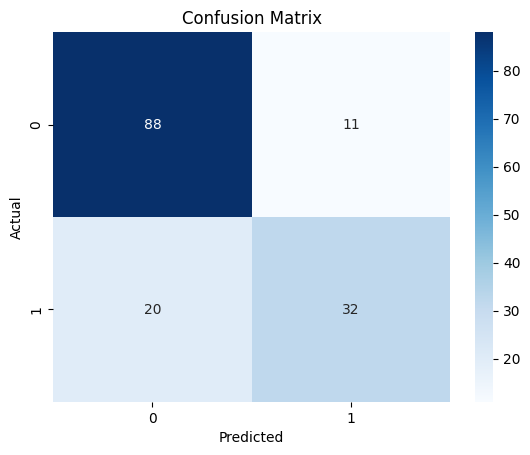

In [ ]:
# Visualize Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Step 5

In [ ]:
# CodeGrade step5

# Calculate AUC, call this auc
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# Calculate ROC curve by finding fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

print(f"fpr: {fpr}")
print(f"tpr: {tpr}")
print(f"thresholds: {thresholds}")

# Return the following
auc, sum(fpr), sum(tpr), sum(thresholds)

AUC: 0.8261460761460762
fpr: [0.         0.         0.         0.01010101 0.01010101 0.02020202
 0.02020202 0.03030303 0.03030303 0.04040404 0.04040404 0.05050505
 0.05050505 0.08080808 0.08080808 0.1010101  0.1010101  0.12121212
 0.12121212 0.14141414 0.14141414 0.16161616 0.16161616 0.18181818
 0.18181818 0.29292929 0.29292929 0.31313131 0.31313131 0.32323232
 0.32323232 0.4040404  0.4040404  0.44444444 0.44444444 0.45454545
 0.45454545 0.51515152 0.51515152 0.55555556 0.55555556 0.60606061
 0.60606061 0.61616162 0.61616162 0.67676768 0.67676768 0.87878788
 0.87878788 1.        ]
tpr: [0.         0.01923077 0.11538462 0.11538462 0.36538462 0.36538462
 0.38461538 0.38461538 0.46153846 0.46153846 0.53846154 0.53846154
 0.55769231 0.55769231 0.59615385 0.59615385 0.61538462 0.61538462
 0.63461538 0.63461538 0.65384615 0.65384615 0.69230769 0.69230769
 0.71153846 0.71153846 0.73076923 0.73076923 0.76923077 0.76923077
 0.78846154 0.78846154 0.80769231 0.80769231 0.82692308 0.82692308
 0.8

(np.float64(0.8261460761460762),
 np.float64(15.040404040404038),
 np.float64(33.51923076923076),
 np.float64(inf))

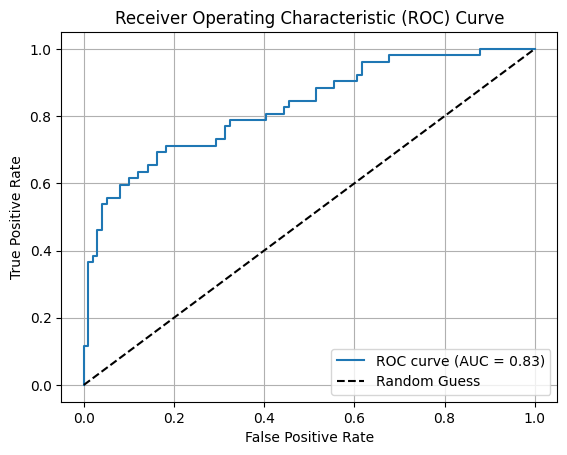

In [ ]:
# Print ROC Curve

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()